# Demand Management Analysis

## Introduction

This notebook demonstrates the analysis performed on the demand management data collected from a DSO in Colombia. The main objectives are to improve the utilization of distribution assets, reduce peak hour congestion, and explore potential differential tariff schemes.

## Data Loading

First, we will load the cleaned data and the normalized data using different normalization methods.

In [1]:
import pandas as pd

dtype = {
    "COD_MEDIDOR": "str",
    "CONSUMO": "int64",
    "DES_CANAL": "str",            
    "TIPO": "str", 
    "HORA": "int64",                                           
    "NIVEL TENSION": "str",            
    "VALOR KWh TARIFA PLANA": "float64",
    "TIPO DIA": "str"
}

# Load the cleaned data
cleaned_data = pd.read_csv('../data/clean/cleaned_data.csv', parse_dates=["FECHA Y HORA", "FECHA"], dtype=dtype, dayfirst=True)

# Load the normalized data
normalized_data_standard = pd.read_csv('../data/processed/normalized_data_standard.csv')
normalized_data_minmax = pd.read_csv('../data/processed/normalized_data_minmax.csv')
normalized_data_robust = pd.read_csv('../data/processed/normalized_data_robust.csv')

## Exploratory Data Analysis (EDA)

### Overview of the Data

In [4]:
cleaned_data.head()
cleaned_data.info()
cleaned_data[['CONSUMO', 'VALOR KWh TARIFA PLANA']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336311 entries, 0 to 336310
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_MEDIDOR             336311 non-null  object 
 1   CONSUMO                 336311 non-null  int64  
 2   DES_CANAL               336311 non-null  object 
 3   FECHA Y HORA            336311 non-null  object 
 4   TIPO                    336311 non-null  object 
 5   HORA                    336311 non-null  int64  
 6   FECHA                   336311 non-null  object 
 7   NIVEL TENSION           336311 non-null  object 
 8   VALOR KWh TARIFA PLANA  336311 non-null  float64
 9   TIPO DIA                336311 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 25.7+ MB


CONSUMO  VALOR KWh TARIFA PLANA
count  336311.000000            3.363110e+05
mean      475.025289            2.889275e+05
std       940.542935            5.751873e+05
min         0.000000            0.000000e+00
25%        57.000000            3.439464e+04
50%       192.000000            1.151879e+05
75%       503.000000            3.046382e+05
max     19825.000000            1.217632e+07

### Distribution of Consumption

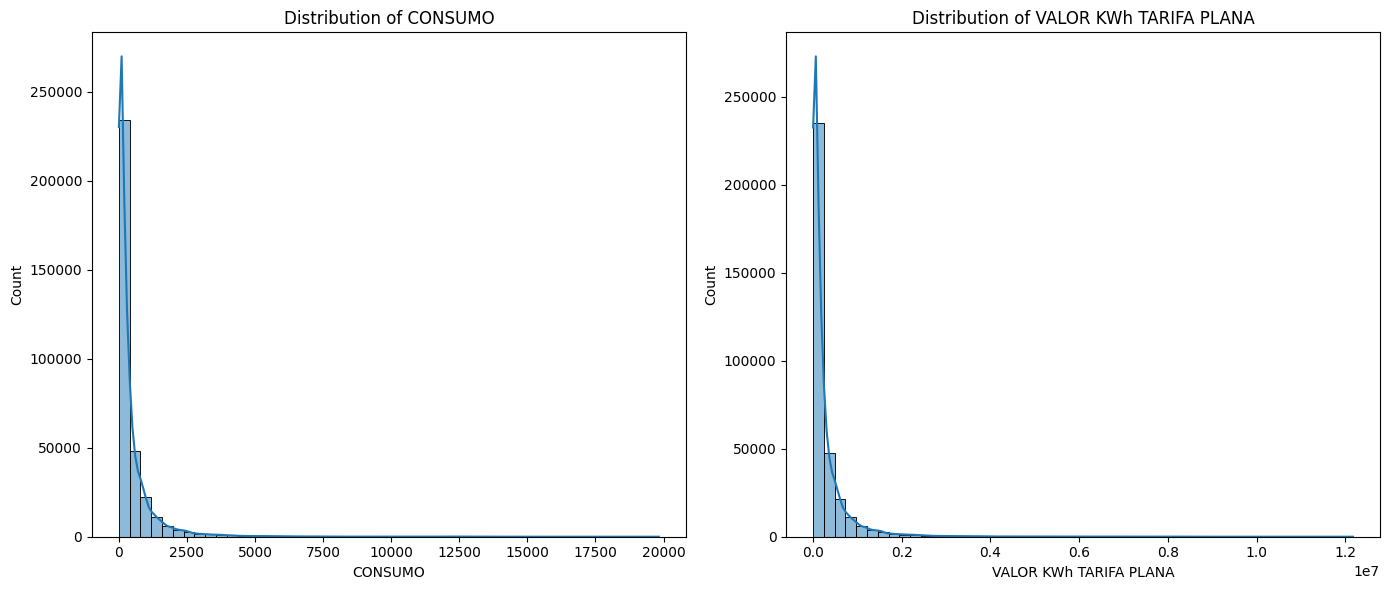

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(cleaned_data['CONSUMO'], bins=50, kde=True)
plt.title('Distribution of CONSUMO')

plt.subplot(1, 2, 2)
sns.histplot(cleaned_data['VALOR KWh TARIFA PLANA'], bins=50, kde=True)
plt.title('Distribution of VALOR KWh TARIFA PLANA')

plt.tight_layout()
plt.show()

## Clustering Analysis

### Finding the Optimal Number of Clusters

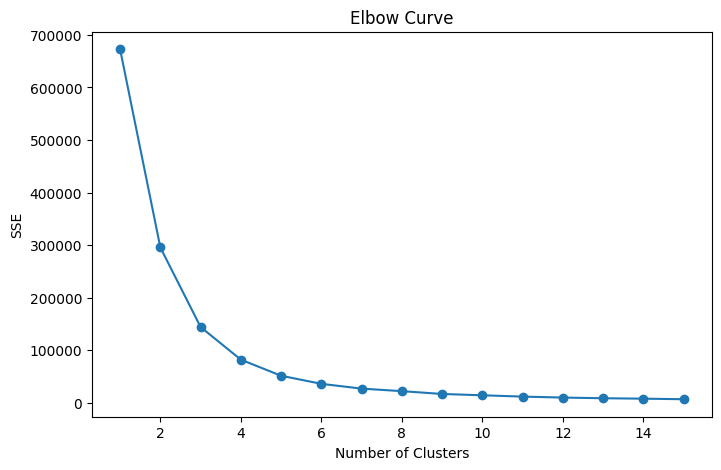

In [6]:
from sklearn.cluster import KMeans

# Define a function to plot the elbow curve
def plot_elbow_curve(data, max_k=15):
    sse = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k+1), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Curve')
    plt.show()

# Plot the elbow curve for the normalized data (standard scaling)
plot_elbow_curve(normalized_data_standard[['CONSUMO', 'VALOR KWh TARIFA PLANA']])

### Applying KMeans Clustering

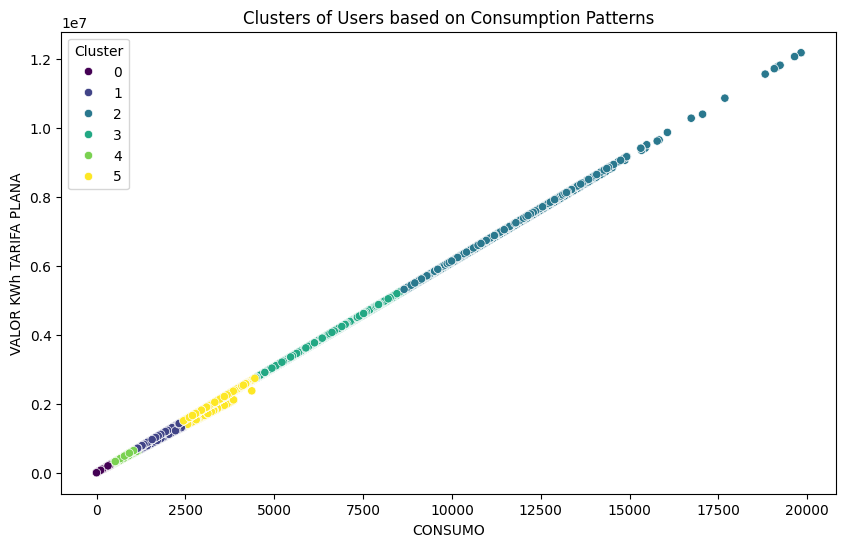

In [7]:
# Assuming the optimal number of clusters is 6 (from the elbow curve)
optimal_clusters = 6

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_data_standard[['CONSUMO', 'VALOR KWh TARIFA PLANA']])

# Add the cluster labels to the original data
cleaned_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='CONSUMO', y='VALOR KWh TARIFA PLANA', hue='Cluster', palette='viridis')
plt.title('Clusters of Users based on Consumption Patterns')
plt.show()

## Conclusions

In this notebook, we have performed the following steps:

- Loaded and explored the cleaned data.
- Visualized the distribution of consumption.
- Applied KMeans clustering to identify patterns in the consumption data.
- Visualized the identified clusters.

**Consumption Distribution**:
    - The distribution of the 'CONSUMO' and 'VALOR KWh TARIFA PLANA' columns indicates variability in energy consumption among different users.
    - The histograms showed that the consumption data is skewed, suggesting the presence of users with significantly higher consumption, which may represent industrial or commercial users.

**Cluster Identification**:
    - We applied KMeans clustering to identify distinct groups of users based on their consumption patterns.
    - The clustering results, visualized through scatter plots, revealed clear distinctions between different user groups. These clusters can help the network operator understand the diversity in consumption patterns.

### Insights and Recommendations

1. **User Characterization**:
    - The identified clusters can be characterized by their consumption behaviors, which can aid in creating targeted demand management strategies. For instance, users in higher consumption clusters might benefit from energy-saving initiatives or differential pricing models.

2. **Demand Management Strategies**:
    - By understanding the consumption patterns, the network operator can implement measures to reduce peak-hour congestion. For example, demand response programs can be tailored for users in specific clusters to shift their consumption to off-peak hours.
    - The insights from the clustering analysis can also support the development of differential tariff schemes, ensuring they are aligned with the consumption behaviors of different user groups.

3. **Future Work**:
    - Further analysis could include integrating additional data sources, such as weather or socio-economic data, to enhance the understanding of factors influencing consumption patterns.
    - Advanced machine learning techniques can be explored to improve the accuracy and granularity of user segmentation.